In [3]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./data/', one_hot=True)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [6]:
#Parameters for training
batch_size = 128
num_epoch = 1
learning_rate = 0.0001
display_step = 100
#Parameters for constructing model
image_height, image_width = 28, 28
k1_size = (5, 5)
k2_size = (5, 5)
k3_size = (5, 5)
k4_size = (5, 5)
in_channel1, in_channel2, in_channel3 = 1, 16, 32

In [5]:
# Information about convolution and transpose convolution:
# https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md

# Define convolution layer ops for constructing model
def conv2d(x, channels, kernel_size):
    return tf.layers.conv2d(inputs=x, filters=channels, kernel_size=kernel_size, strides=(1,1), padding='SAME', activation=tf.nn.relu)

def conv2d_transpose(h, channels, kernel_size):
    return tf.layers.conv2d_transpose(inputs=h, filters=channels, kernel_size=kernel_size, strides=(1,1), padding='SAME', activation=tf.sigmoid)
    

In [4]:
# TODO: Construct an encoder with two 2-D convolution layer and return h
def encoder(x, in_channel1, in_channel2, k1_size, k2_size):
    ???
    return ???

In [5]:
# TODO: Construct a decoder with two trnsposed 2-D convolution layer and return the reconstructed image
def decoder(h, out_channel1, out_channel2, k1_size, k2_size):
    ???
    return ???

In [6]:
X = tf.placeholder(tf.float32, shape=[None, image_height, image_width, 1])

In [7]:
# TODO: Build the auto encoder model
encoded_vec = 
reconstructed = 
loss_op = tf.reduce_mean(tf.square(tf.subtract(reconstructed, X)))
train_op = tf.train.AdamOptimizer(learning_rate).minimize(loss_op)

Epoch:  1 Step:  1 Loss:  0.41210833
Epoch:  1 Step:  100 Loss:  0.052818876
Epoch:  1 Step:  200 Loss:  0.013820697
Epoch:  1 Step:  300 Loss:  0.008106506
Epoch:  1 Step:  400 Loss:  0.005331836
Epoch:  2 Step:  1 Loss:  0.0047927466
Epoch:  2 Step:  100 Loss:  0.003556026
Epoch:  2 Step:  200 Loss:  0.002810175
Epoch:  2 Step:  300 Loss:  0.0023349428
Epoch:  2 Step:  400 Loss:  0.002004261
Epoch:  3 Step:  1 Loss:  0.0019229332
Epoch:  3 Step:  100 Loss:  0.001702882
Epoch:  3 Step:  200 Loss:  0.0015321404
Epoch:  3 Step:  300 Loss:  0.0013938692
Epoch:  3 Step:  400 Loss:  0.0012779598
Epoch:  4 Step:  1 Loss:  0.0012466876
Epoch:  4 Step:  100 Loss:  0.0011527986
Epoch:  4 Step:  200 Loss:  0.0010703485
Epoch:  4 Step:  300 Loss:  0.0009979642
Epoch:  4 Step:  400 Loss:  0.0009335891
Epoch:  5 Step:  1 Loss:  0.0009155919
Epoch:  5 Step:  100 Loss:  0.0008603938
Epoch:  5 Step:  200 Loss:  0.0008104969
Epoch:  5 Step:  300 Loss:  0.0007661356
Epoch:  5 Step:  400 Loss:  0.000726

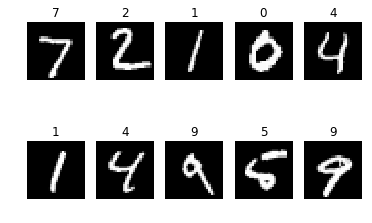

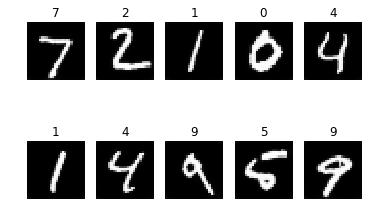

In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    batch_x = batch_x.reshape(batch_size, image_height, image_width, 1)
    total_steps = int(55000/batch_size)
    for epoch in range(1,num_epoch+1):
        for step in range(1,total_steps+1):
            _, train_loss = sess.run([train_op, loss_op], feed_dict={X:batch_x})
            if step%display_step == 0 or step == 1:
                print('Epoch: ', epoch, 'Step: ', step, 'Loss: ', train_loss)
    print('Finish Training!')
    
    # Testing section
    test_len = 10
    test_x = mnist.test.images[:test_len].reshape(-1, image_height, image_width, 1)
    test_y = mnist.test.labels[:test_len]
    output_images = sess.run(reconstructed, feed_dict={X:test_x})
    
    # plot visualize the test input and output images 
    fig, axeslist = plt.subplots(ncols=5, nrows=int(test_len/5))
    for index,title in zip(range(test_len), test_x):
        axeslist.ravel()[index].imshow(title.reshape(28,28), cmap=plt.gray())
        axeslist.ravel()[index].set_title(np.argmax(test_y[index]))
        axeslist.ravel()[index].set_axis_off()
    fig, axeslist = plt.subplots(ncols=5, nrows=int(test_len/5))
    for index,title in zip(range(test_len), output_images):
        axeslist.ravel()[index].imshow(title.reshape(28,28), cmap=plt.gray())
        axeslist.ravel()[index].set_title(np.argmax(test_y[index]))
        axeslist.ravel()[index].set_axis_off()
